Finding the correlation between variables that determine movie rating.

In [64]:
#Import required Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)#Adjusts the configuation  of the plots we will create


In [65]:
#Load our dataset 
movie_data = pd.read_csv('D:/DS/dataset/movies.csv')
#Get a summary of the top 5 rows
movie_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [66]:
#Check for missing data and also in it's percentage form
for col in movie_data.columns:
    pct_missing=np.mean(movie_data[col].isnull())
    missing = np.sum(movie_data[col].isnull())
    print('{} - {} - {:.2f}%'.format(col,missing,pct_missing))

name - 0 - 0.00%
rating - 77 - 0.01%
genre - 0 - 0.00%
year - 0 - 0.00%
released - 2 - 0.00%
score - 3 - 0.00%
votes - 3 - 0.00%
director - 0 - 0.00%
writer - 3 - 0.00%
star - 1 - 0.00%
country - 3 - 0.00%
budget - 2171 - 0.28%
gross - 189 - 0.02%
company - 17 - 0.00%
runtime - 4 - 0.00%


In [67]:
#Check how our data is in terms of rows and columns
movie_data.shape

(7668, 15)

In [68]:
#Cs hecking for the data types from our columns
movie_data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [71]:
#Changing the Budget ,gross and votes data type
movie_data['budget']=movie_data['budget'].astype('int64')
movie_data['gross']=movie_data['gross'].astype('int64')
movie_data['votes']=movie_data['votes'].astype('int64')

In [72]:
movie_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [73]:
#Check if year matches released year correctly if not we correct it
movie_data[['released','year']].T


,0,1,2,3,4,5,6,7,8,9,...,7658,7659,7660,7661,7662,7663,7664,7665,7666,7667
released,"June 13, 1980 (United States)","July 2, 1980 (United States)","June 20, 1980 (United States)","July 2, 1980 (United States)","July 25, 1980 (United States)","May 9, 1980 (United States)","June 20, 1980 (United States)","December 19, 1980 (United States)","June 19, 1981 (United States)","May 16, 1980 (United States)",...,"February 7, 2020 (United States)","March 3, 2020 (United States)","November 5, 2020 (United States)","November 6, 2020 (United States)","November 10, 2020 (United States)","October 23, 2020 (United States)","February 7, 2020 (United States)","April 27, 2020 (Cameroon)","October 1, 2020 (United States)","August 19, 2020 (United States)"
year,1980,1980,1980,1980,1980,1980,1980,1980,1980,1980,...,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020


In [75]:
#Separate Country from date 
reltdctry=movie_data['released'].str.split(pat='(',expand=True)
reltdctry.head()

,0,1
0,"June 13, 1980",United States)
1,"July 2, 1980",United States)
2,"June 20, 1980",United States)
3,"July 2, 1980",United States)
4,"July 25, 1980",United States)


In [76]:
#Joining the above movie_data dataframe with our main dataset
movie_data = pd.concat([movie_data, reltdctry], axis = 1)

In [77]:
#Rename to meaningful names real date and real country
movie_data = movie_data.rename(columns = {0:'realDate', 1:'realCountry'})
movie_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,realDate,realCountry
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States)


In [78]:
#Remove closing bracket from realcountry
movie_data['realCountry'] = movie_data['realCountry'].astype(str).str.replace(')','')
movie_data.head()

<ipython-input-78-eef9dcd24e5e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  movie_data['realCountry'] = movie_data['realCountry'].astype(str).str.replace(')','')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,realDate,realCountry
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States


In [79]:
#Split the date to get the realYear the movie was released.
movie_data['realYear']=movie_data['realDate'].str[-5:]

In [17]:
#View the data set in way you can scroll
#pd.set_option('display.max_rows',None)
#movie_data.sort_values(by=['gross'],inplace=False,ascending=False)

In [81]:
movie_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,realDate,realCountry,realYear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States,1980


In [82]:
movie_data['rating'].value_counts()

R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
TV-14           1
Approved        1
Name: rating, dtype: int64

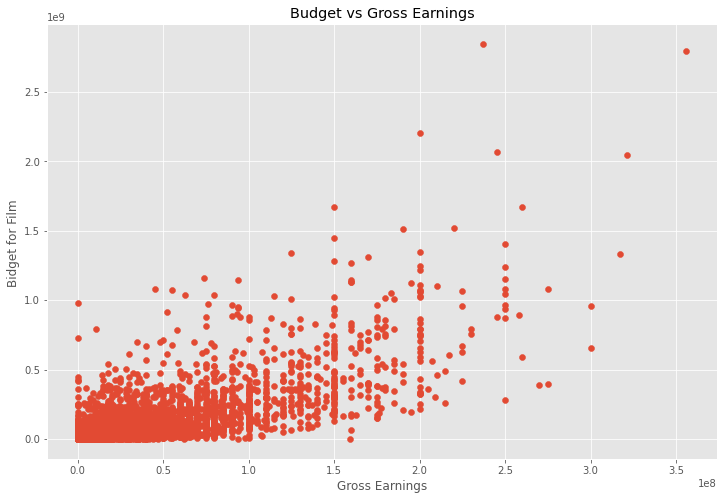

In [19]:
#Scatter plot with budget vs gross
plt.scatter(x=movie_data['budget'],y=movie_data['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Bidget for Film ');

<AxesSubplot:xlabel='budget', ylabel='gross'>

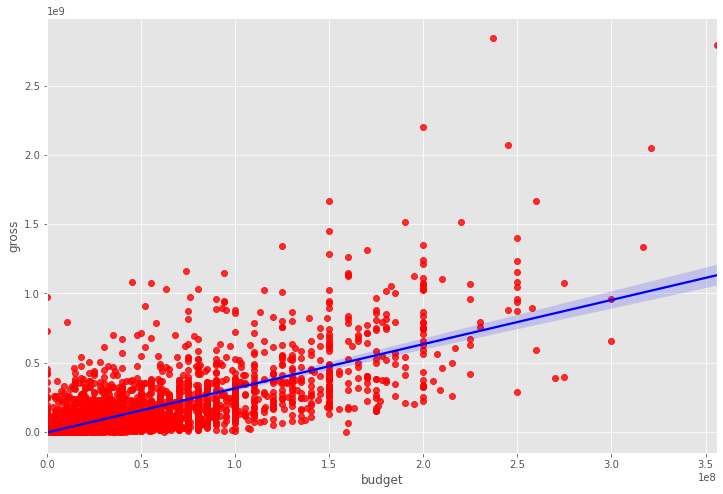

In [23]:
#Plot Budget vs gross using seaborn
sns.regplot(x='budget',y='gross',data=movie_data,scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [25]:
#Performing correlation on our dataset
movie_data.corr(method='pearson')#deault method is pearson other types (kendall,spearman)

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222427,0.409182,1.000000,0.486931,0.632870,0.309122
budget,0.309212,0.055665,0.486931,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632870,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309122,0.269510,0.245235,1.000000


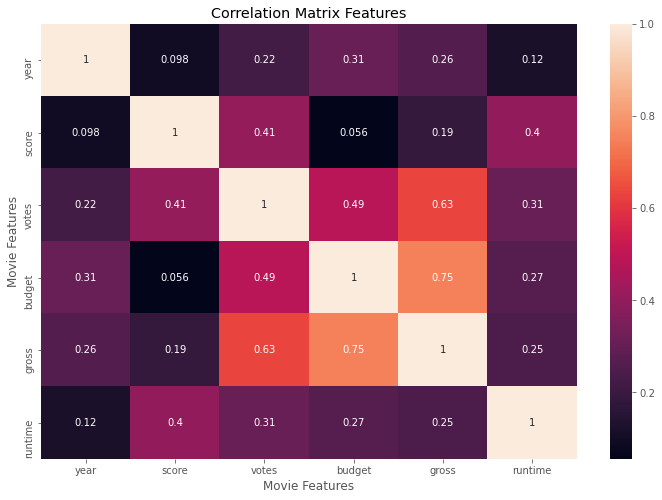

In [29]:
#Plotting a correlation matrix visualization using seaborn
corr_matrix=movie_data.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features');

In [50]:
movie_numerised=movie_data

for col_name in movie_numerised.columns:
    if(movie_numerised[col_name].dtype=='object'):
        movie_numerised[col_name]=movie_numerised[col_name].astype('category')
        movie_numerised[col_name]=movie_numerised[col_name].cat.codes
movie_numerised.dtypes

name             int16
rating            int8
genre             int8
year             int64
released         int16
score          float64
votes            int64
director         int16
writer           int16
star             int16
country           int8
budget           int64
gross            int64
company          int16
runtime        float64
realDate         int16
realCountry       int8
realYear          int8
dtype: object

In [51]:
movie_numerised.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,realDate,realCountry,realYear
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,-0.011223,-0.000569,0.010225
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.015735,0.025061,0.006403
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,0.029039,-0.090843,-0.078210
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,-0.000832,-0.088273,0.996397
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868,0.999912,-0.046839,-0.003775
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.042918,-0.094147,0.106295
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.409182,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.309122,0.016892,0.092341,0.217782
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.001275,0.013293,-0.020385
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.002421,-0.001848,-0.008391
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,0.015597,-0.023568,-0.027606


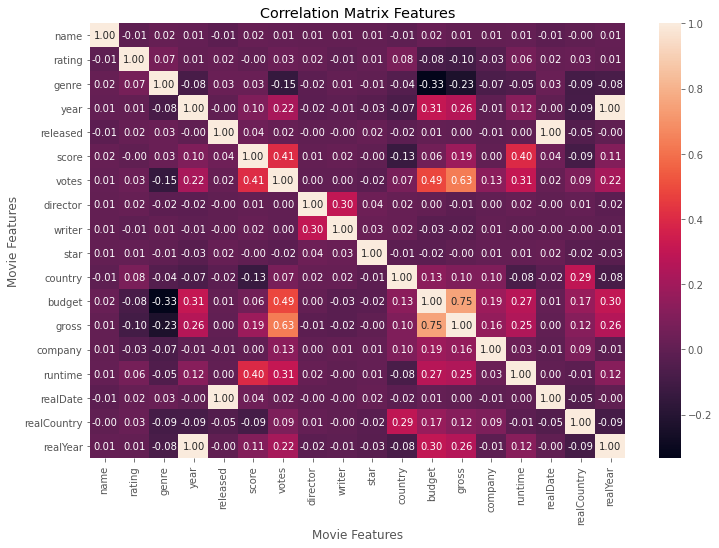

In [52]:
corr_matrix=movie_numerised.corr(method='pearson')
sns.heatmap(corr_matrix,fmt='.2f',annot=True)
plt.title('Correlation Matrix Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features');

In [53]:
#Creating correlation pairs across each movie feature. 
correlation_mat=movie_numerised.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013038
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.010392
             realDate      -0.011223
             realCountry   -0.000569
             realYear       0.010225
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033743
             director       0.019483
             writer        -0.005921
 

In [58]:
#Creating correlation sorted pairs
sort_pairs=corr_pairs.sort_values()

sort_pairs


budget       genre         -0.334021
genre        budget        -0.334021
gross        genre         -0.234297
genre        gross         -0.234297
votes        genre         -0.145296
genre        votes         -0.145296
country      score         -0.133348
score        country       -0.133348
rating       gross         -0.095450
gross        rating        -0.095450
score        realCountry   -0.094147
realCountry  score         -0.094147
             realYear      -0.091630
realYear     realCountry   -0.091630
realCountry  genre         -0.090843
genre        realCountry   -0.090843
year         realCountry   -0.088273
realCountry  year          -0.088273
budget       rating        -0.081939
rating       budget        -0.081939
year         genre         -0.081261
genre        year          -0.081261
country      realYear      -0.079009
realYear     country       -0.079009
runtime      country       -0.078412
country      runtime       -0.078412
realYear     genre         -0.078210
g

In [61]:
#High correlated movie features greater than 0.5
high_corr=sort_pairs[(sort_pairs) > 0.5]

high_corr

votes        gross          0.632870
gross        votes          0.632870
budget       gross          0.750157
gross        budget         0.750157
year         realYear       0.996397
realYear     year           0.996397
realDate     released       0.999912
released     realDate       0.999912
name         name           1.000000
realDate     realDate       1.000000
rating       rating         1.000000
genre        genre          1.000000
year         year           1.000000
released     released       1.000000
score        score          1.000000
votes        votes          1.000000
realCountry  realCountry    1.000000
director     director       1.000000
star         star           1.000000
country      country        1.000000
budget       budget         1.000000
gross        gross          1.000000
company      company        1.000000
runtime      runtime        1.000000
writer       writer         1.000000
realYear     realYear       1.000000
dtype: float64

1.In relation to gross earnings votes and budget have a high correlation